In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
data = pd.read_csv('Dilute_Solute_Diffusion_with_features.csv')
data.head()

,Material compositions 1,Material compositions 2,Enorm (eV),E_raw (eV),Site2_MeltingT,Site1_MendeleevNumber,Site1_MiracleRadius,GSestFCClatcnt_max_value,Site2_BCCenergy_pa,Site1_BCCfermi,...,BCCenergy_pa_composition_average,MiracleRadius_min_value,MeltingT_min_value,NUnfilled_max_value,Site2_Group,Site1_CovalentRadii,Site2_NUnfilled,SpecificHeatCapacity_difference,Site1_Electronegativity,BCCenergy_pa_arithmetic_average
0,Ag,Ag,0.000000,1.824450,-0.531814,0.402504,0.263045,-0.626925,1.021337,-1.217816,...,1.386573,0.859808,-0.046109,-1.546561,0.626615,0.690287,-1.036320,-1.057898,0.099471,1.386573
1,Ag,Co,-0.090142,1.734308,0.064051,0.402504,0.263045,-0.626925,-0.248457,-1.217816,...,0.484851,-0.730180,-0.046109,-0.801582,0.116318,0.690287,-0.391288,-0.388610,0.099471,0.484851
2,Ag,Cr,0.259139,2.083589,0.524584,0.402504,0.263045,-0.626925,-1.000991,-1.217816,...,-0.049547,-0.311762,-0.046109,0.315885,-0.649128,0.690287,0.576260,-0.287857,0.099471,-0.049547
3,Ag,Cu,-0.022200,1.802250,-0.394504,0.402504,0.263045,-0.626925,0.746249,-1.217816,...,1.191224,-0.646497,-0.046109,-1.546561,0.626615,0.690287,-1.036320,-0.518150,0.099471,1.191224
4,Ag,Fe,0.317672,2.142122,0.112116,0.402504,0.263045,-0.626925,-0.637552,-1.217816,...,0.208542,-0.730180,-0.046109,-0.429093,-0.138831,0.690287,-0.068772,-0.287857,0.099471,0.208542


In [3]:
data.columns

Index(['Material compositions 1', 'Material compositions 2', 'Enorm (eV)',
       'E_raw (eV)', 'Site2_MeltingT', 'Site1_MendeleevNumber',
       'Site1_MiracleRadius', 'GSestFCClatcnt_max_value', 'Site2_BCCenergy_pa',
       'Site1_BCCfermi', 'CovalentRadius_max_value', 'Site2_Density',
       'n_ws^third_min_value', 'Site1_HHIr', 'IonicRadii_max_value',
       'BoilingT_max_value', 'valence_arithmetic_average', 'Site2_NdUnfilled',
       'Site1_IonicRadii', 'BCCenergy_pa_composition_average',
       'MiracleRadius_min_value', 'MeltingT_min_value', 'NUnfilled_max_value',
       'Site2_Group', 'Site1_CovalentRadii', 'Site2_NUnfilled',
       'SpecificHeatCapacity_difference', 'Site1_Electronegativity',
       'BCCenergy_pa_arithmetic_average'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Material compositions 1           408 non-null    object 
 1   Material compositions 2           408 non-null    object 
 2   Enorm (eV)                        408 non-null    float64
 3   E_raw (eV)                        408 non-null    float64
 4   Site2_MeltingT                    408 non-null    float64
 5   Site1_MendeleevNumber             408 non-null    float64
 6   Site1_MiracleRadius               408 non-null    float64
 7   GSestFCClatcnt_max_value          408 non-null    float64
 8   Site2_BCCenergy_pa                408 non-null    float64
 9   Site1_BCCfermi                    408 non-null    float64
 10  CovalentRadius_max_value          408 non-null    float64
 11  Site2_Density                     408 non-null    float64
 12  n_ws^thi

In [5]:
x1 = data['Material compositions 1'].unique()
x2 = data['Material compositions 2'].unique()

print(x1)
print(x2)

count = 0
for i in x1:
    count +=1
    
print(count)
    

['Ag' 'Al' 'Au' 'Ca' 'Cu' 'Fe' 'Ir' 'Mg' 'Mo' 'Ni' 'Pb' 'Pd' 'Pt' 'W' 'Zr']
['Ag' 'Co' 'Cr' 'Cu' 'Fe' 'Mn' 'Ni' 'Sc' 'Ti' 'V' 'Zn' 'Al' 'As' 'Au' 'Bi'
 'Ca' 'Cd' 'Ce' 'Er' 'Ga' 'Ge' 'Hf' 'Hg' 'In' 'Ir' 'La' 'Mg' 'Mo' 'Na'
 'Nb' 'Nd' 'Os' 'P' 'Pb' 'Pd' 'Pt' 'Re' 'Rh' 'Ru' 'S' 'Sb' 'Se' 'Si' 'Sn'
 'Ta' 'Tc' 'Te' 'Tl' 'W' 'Y' 'Zr' 'Be' 'Gd' 'K' 'Li' 'Pr' 'Sr' 'Th']
15


In [6]:
data_grp = data.groupby(['Material compositions 1'])
data_grp.get_group('Ag')

,Material compositions 1,Material compositions 2,Enorm (eV),E_raw (eV),Site2_MeltingT,Site1_MendeleevNumber,Site1_MiracleRadius,GSestFCClatcnt_max_value,Site2_BCCenergy_pa,Site1_BCCfermi,...,BCCenergy_pa_composition_average,MiracleRadius_min_value,MeltingT_min_value,NUnfilled_max_value,Site2_Group,Site1_CovalentRadii,Site2_NUnfilled,SpecificHeatCapacity_difference,Site1_Electronegativity,BCCenergy_pa_arithmetic_average
0,Ag,Ag,0.000000,1.824450,-0.531814,0.402504,0.263045,-0.626925,1.021337,-1.217816,...,1.386573,0.859808,-0.046109,-1.546561,0.626615,0.690287,-1.036320,-1.057898,0.099471,1.386573
1,Ag,Co,-0.090142,1.734308,0.064051,0.402504,0.263045,-0.626925,-0.248457,-1.217816,...,0.484851,-0.730180,-0.046109,-0.801582,0.116318,0.690287,-0.391288,-0.388610,0.099471,0.484851
2,Ag,Cr,0.259139,2.083589,0.524584,0.402504,0.263045,-0.626925,-1.000991,-1.217816,...,-0.049547,-0.311762,-0.046109,0.315885,-0.649128,0.690287,0.576260,-0.287857,0.099471,-0.049547
3,Ag,Cu,-0.022200,1.802250,-0.394504,0.402504,0.263045,-0.626925,0.746249,-1.217816,...,1.191224,-0.646497,-0.046109,-1.546561,0.626615,0.690287,-1.036320,-0.518150,0.099471,1.191224
4,Ag,Fe,0.317672,2.142122,0.112116,0.402504,0.263045,-0.626925,-0.637552,-1.217816,...,0.208542,-0.730180,-0.046109,-0.429093,-0.138831,0.690287,-0.068772,-0.287857,0.099471,0.208542
5,Ag,Mn,0.202186,2.026636,-0.214281,0.402504,0.263045,-0.626925,-0.811899,-1.217816,...,0.084733,-0.144395,-0.046109,-0.056604,-0.393979,0.690287,0.253744,-0.176309,0.099471,0.084733
6,Ag,Ni,0.250571,2.075021,0.019339,0.402504,0.263045,-0.626925,0.210847,-1.217816,...,0.811018,-0.646497,-0.046109,-1.174071,0.371466,0.690287,-0.713804,-0.305849,0.099471,0.811018
7,Ag,Sc,-0.001431,1.823019,0.115469,0.402504,0.263045,0.294637,-0.007621,-1.217816,...,0.655877,0.859808,-0.046109,1.433353,-1.414574,0.690287,1.543809,0.140343,0.099471,0.655877
8,Ag,Ti,0.164968,1.989418,0.257430,0.402504,0.263045,-0.564887,-0.451494,-1.217816,...,0.340668,0.692440,-0.046109,1.060864,-1.159425,0.690287,1.221293,-0.021581,0.099471,0.340668
9,Ag,V,0.248163,2.072613,0.527937,0.402504,0.263045,-0.626925,-0.832421,-1.217816,...,0.070160,0.022972,-0.046109,0.688375,-0.904276,0.690287,0.898777,-0.143924,0.099471,0.070160


79.7


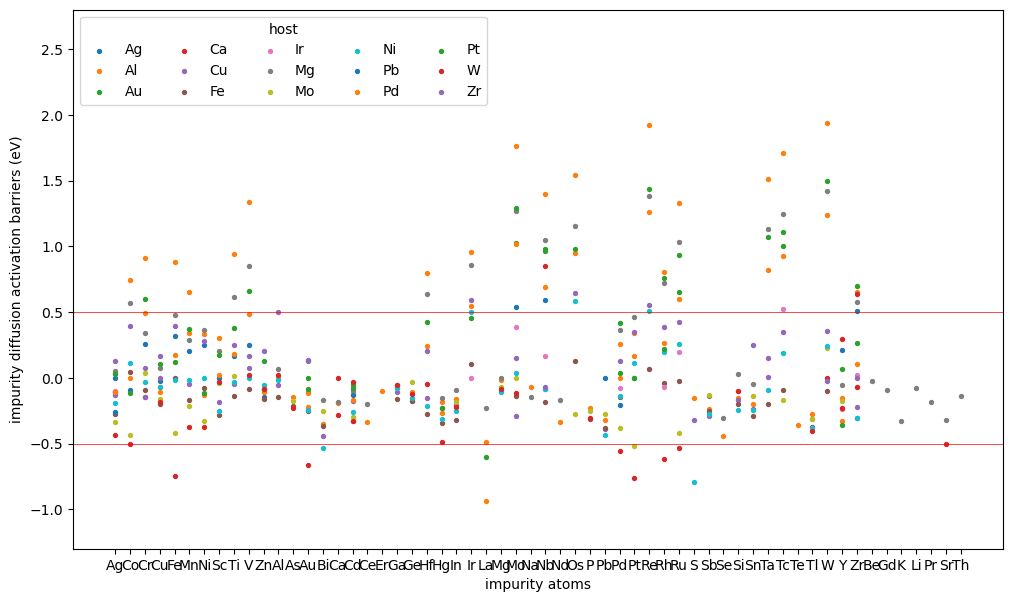

In [7]:
plt.figure(figsize=(12,7))
for atom in x1:
    df = data_grp.get_group(atom)
    plt.scatter(df['Material compositions 2'], df['Enorm (eV)'], label=atom, s=8)
    
plt.xlabel('impurity atoms')
plt.ylabel('impurity diffusion activation barriers (eV)')
plt.ylim(-1.3,2.8)
plt.axhline(y=0.5, c='red', linewidth=0.5)
plt.axhline(y=-0.5, c='red', linewidth=0.5)
plt.legend(title='host', loc='upper left', ncol=5)

percent = data.loc[(data['Enorm (eV)']>=-0.5) & (data['Enorm (eV)']<=0.5), 'Enorm (eV)'].count()

print(round(percent/data.shape[0]*100, 1))

plt.show()

In [8]:
data_new = data.drop(['Material compositions 1', 'Material compositions 2', 'E_raw (eV)'], axis=1)
data_new.shape

(408, 26)

<Axes: >

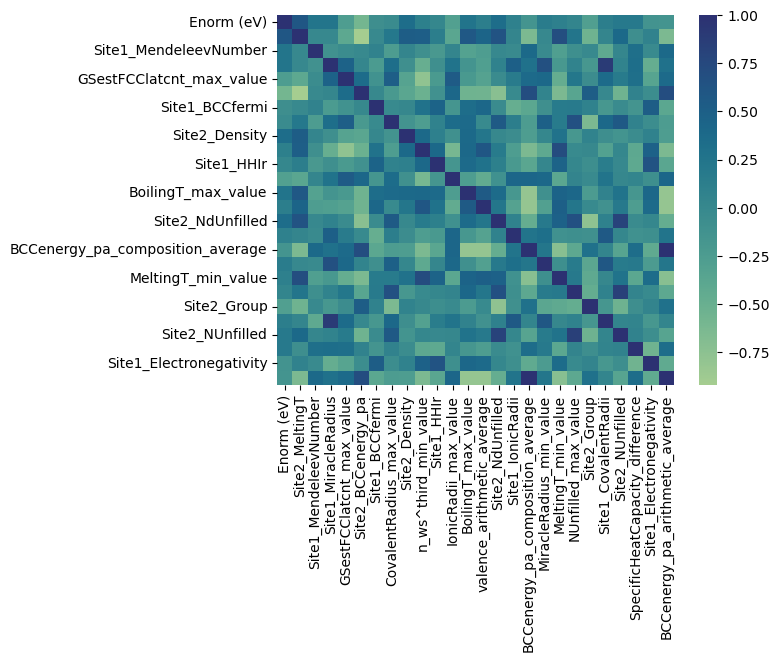

In [9]:
sns.heatmap(data_new.corr(), cmap='crest')

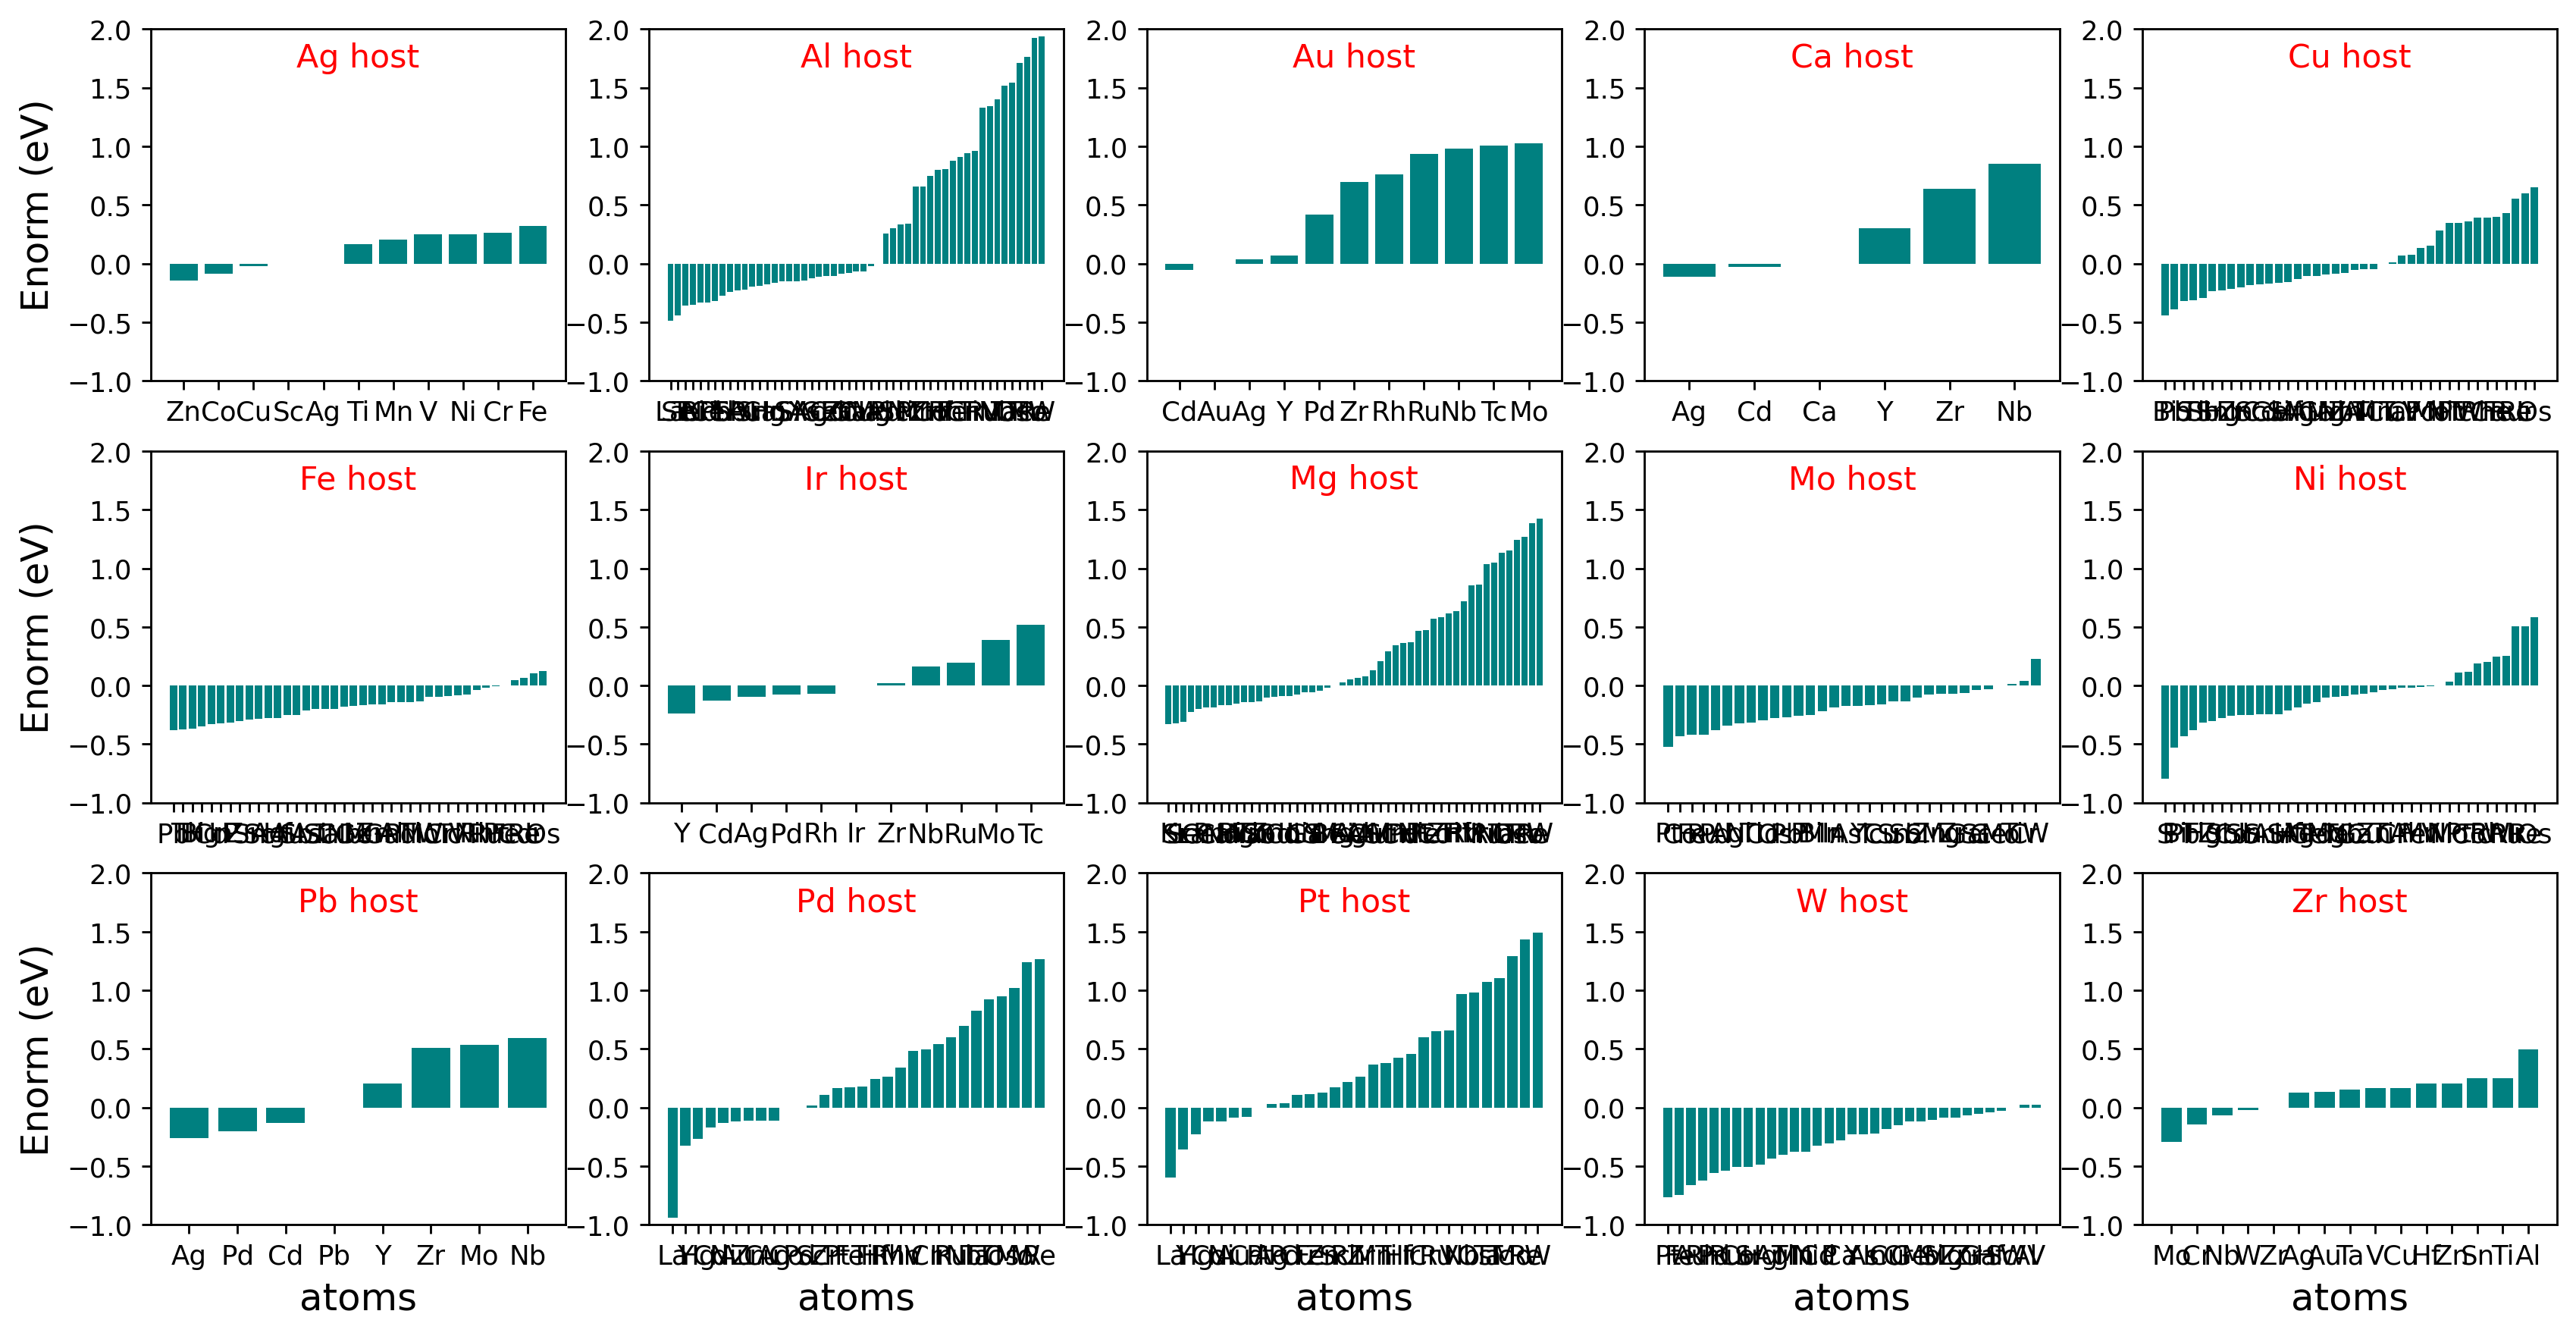

In [10]:
fig, axs = plt.subplots(3, 5, figsize=(16, 8), dpi = 256)
plt.rcParams['axes.titley'] = 1.0
plt.rcParams['axes.titlepad'] = -14
mpl.rcParams.update({'font.size': 8})

count = 0
    
for i in range(3):
    for j in range(5):
        df = data_grp.get_group(x1[count]).sort_values(by='Enorm (eV)')
        axs[i, j].bar(df['Material compositions 2'], df['Enorm (eV)'], color = 'teal')
        axs[i, j].set_title(f'{x1[count]} host', c='red', fontsize=12)
        axs[i, j].set_ylim(-1,2)
        count += 1
        if j == 0:
            axs[i, j].set_ylabel("Enorm (eV)", fontsize=14)        
        if i == 2:
            axs[i, j].set_xlabel("atoms", fontsize=14)
            
plt.savefig('dataset_hist.tif', bbox_inches = 'tight')

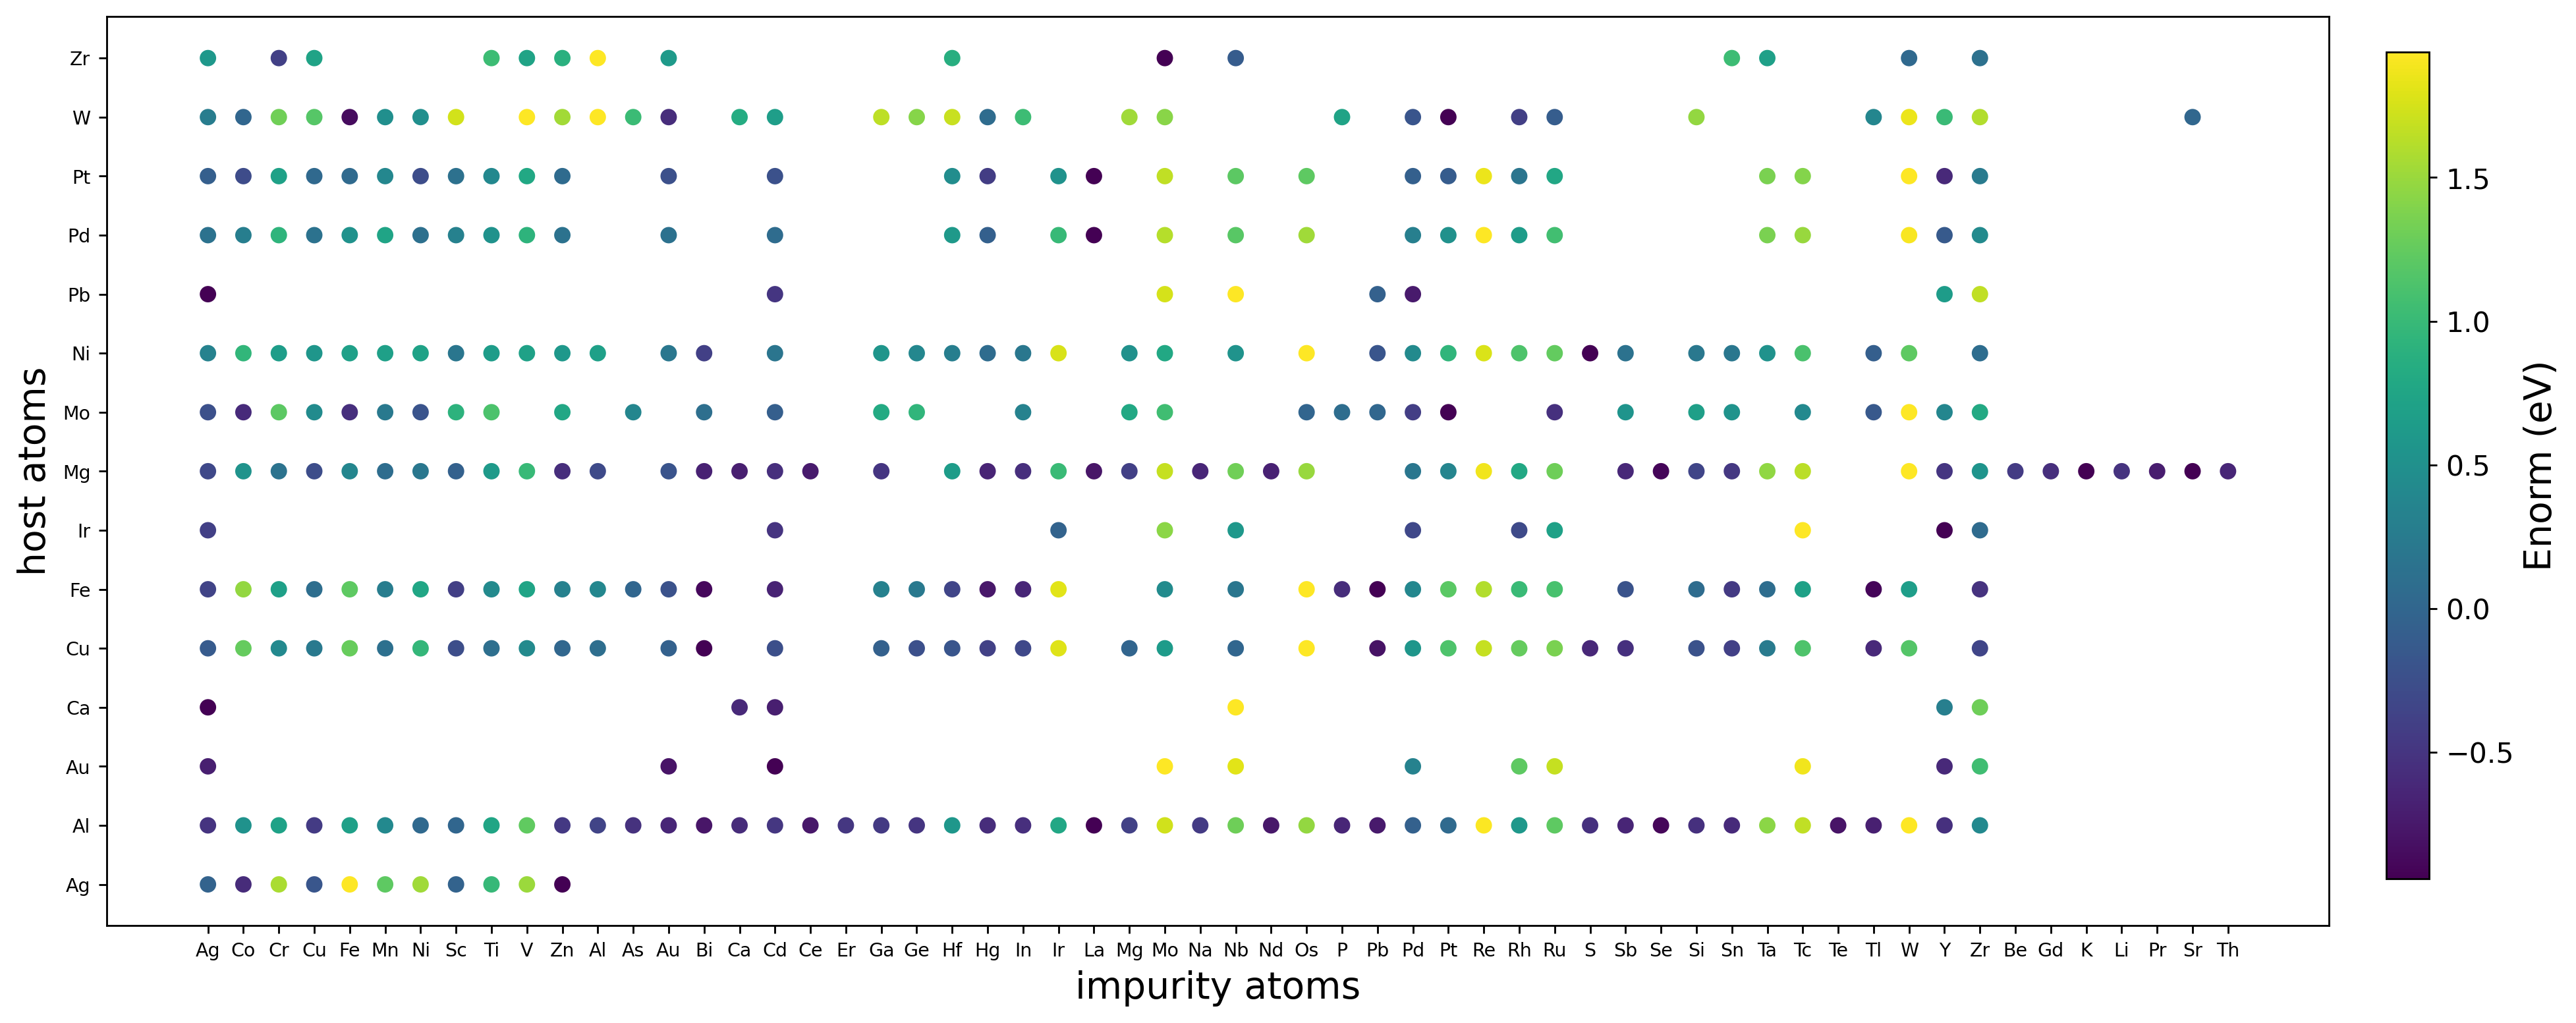

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(17, 7), dpi = 256)
mpl.rcParams.update({'font.size': 12})

for atom in x1:
    df = data_grp.get_group(atom)
    ax.scatter(df['Material compositions 2'], df['Material compositions 1'], c=df['Enorm (eV)'])
    
ax.set_xlabel('impurity atoms', fontsize=16)
ax.set_ylabel('host atoms', fontsize=16)

norm = mpl.colors.Normalize(data_new['Enorm (eV)'].min(), data_new['Enorm (eV)'].max())
m = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
#m.set_array([])

cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])    
cbar = fig.colorbar(m, cax=cbar_ax, shrink=0.1)

cbar.set_label('Enorm (eV)', fontsize=16)

plt.savefig('dataset.tif', bbox_inches = 'tight')

plt.show()

/tmp/ipykernel_724/3838609102.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = get_cmap(cmap)


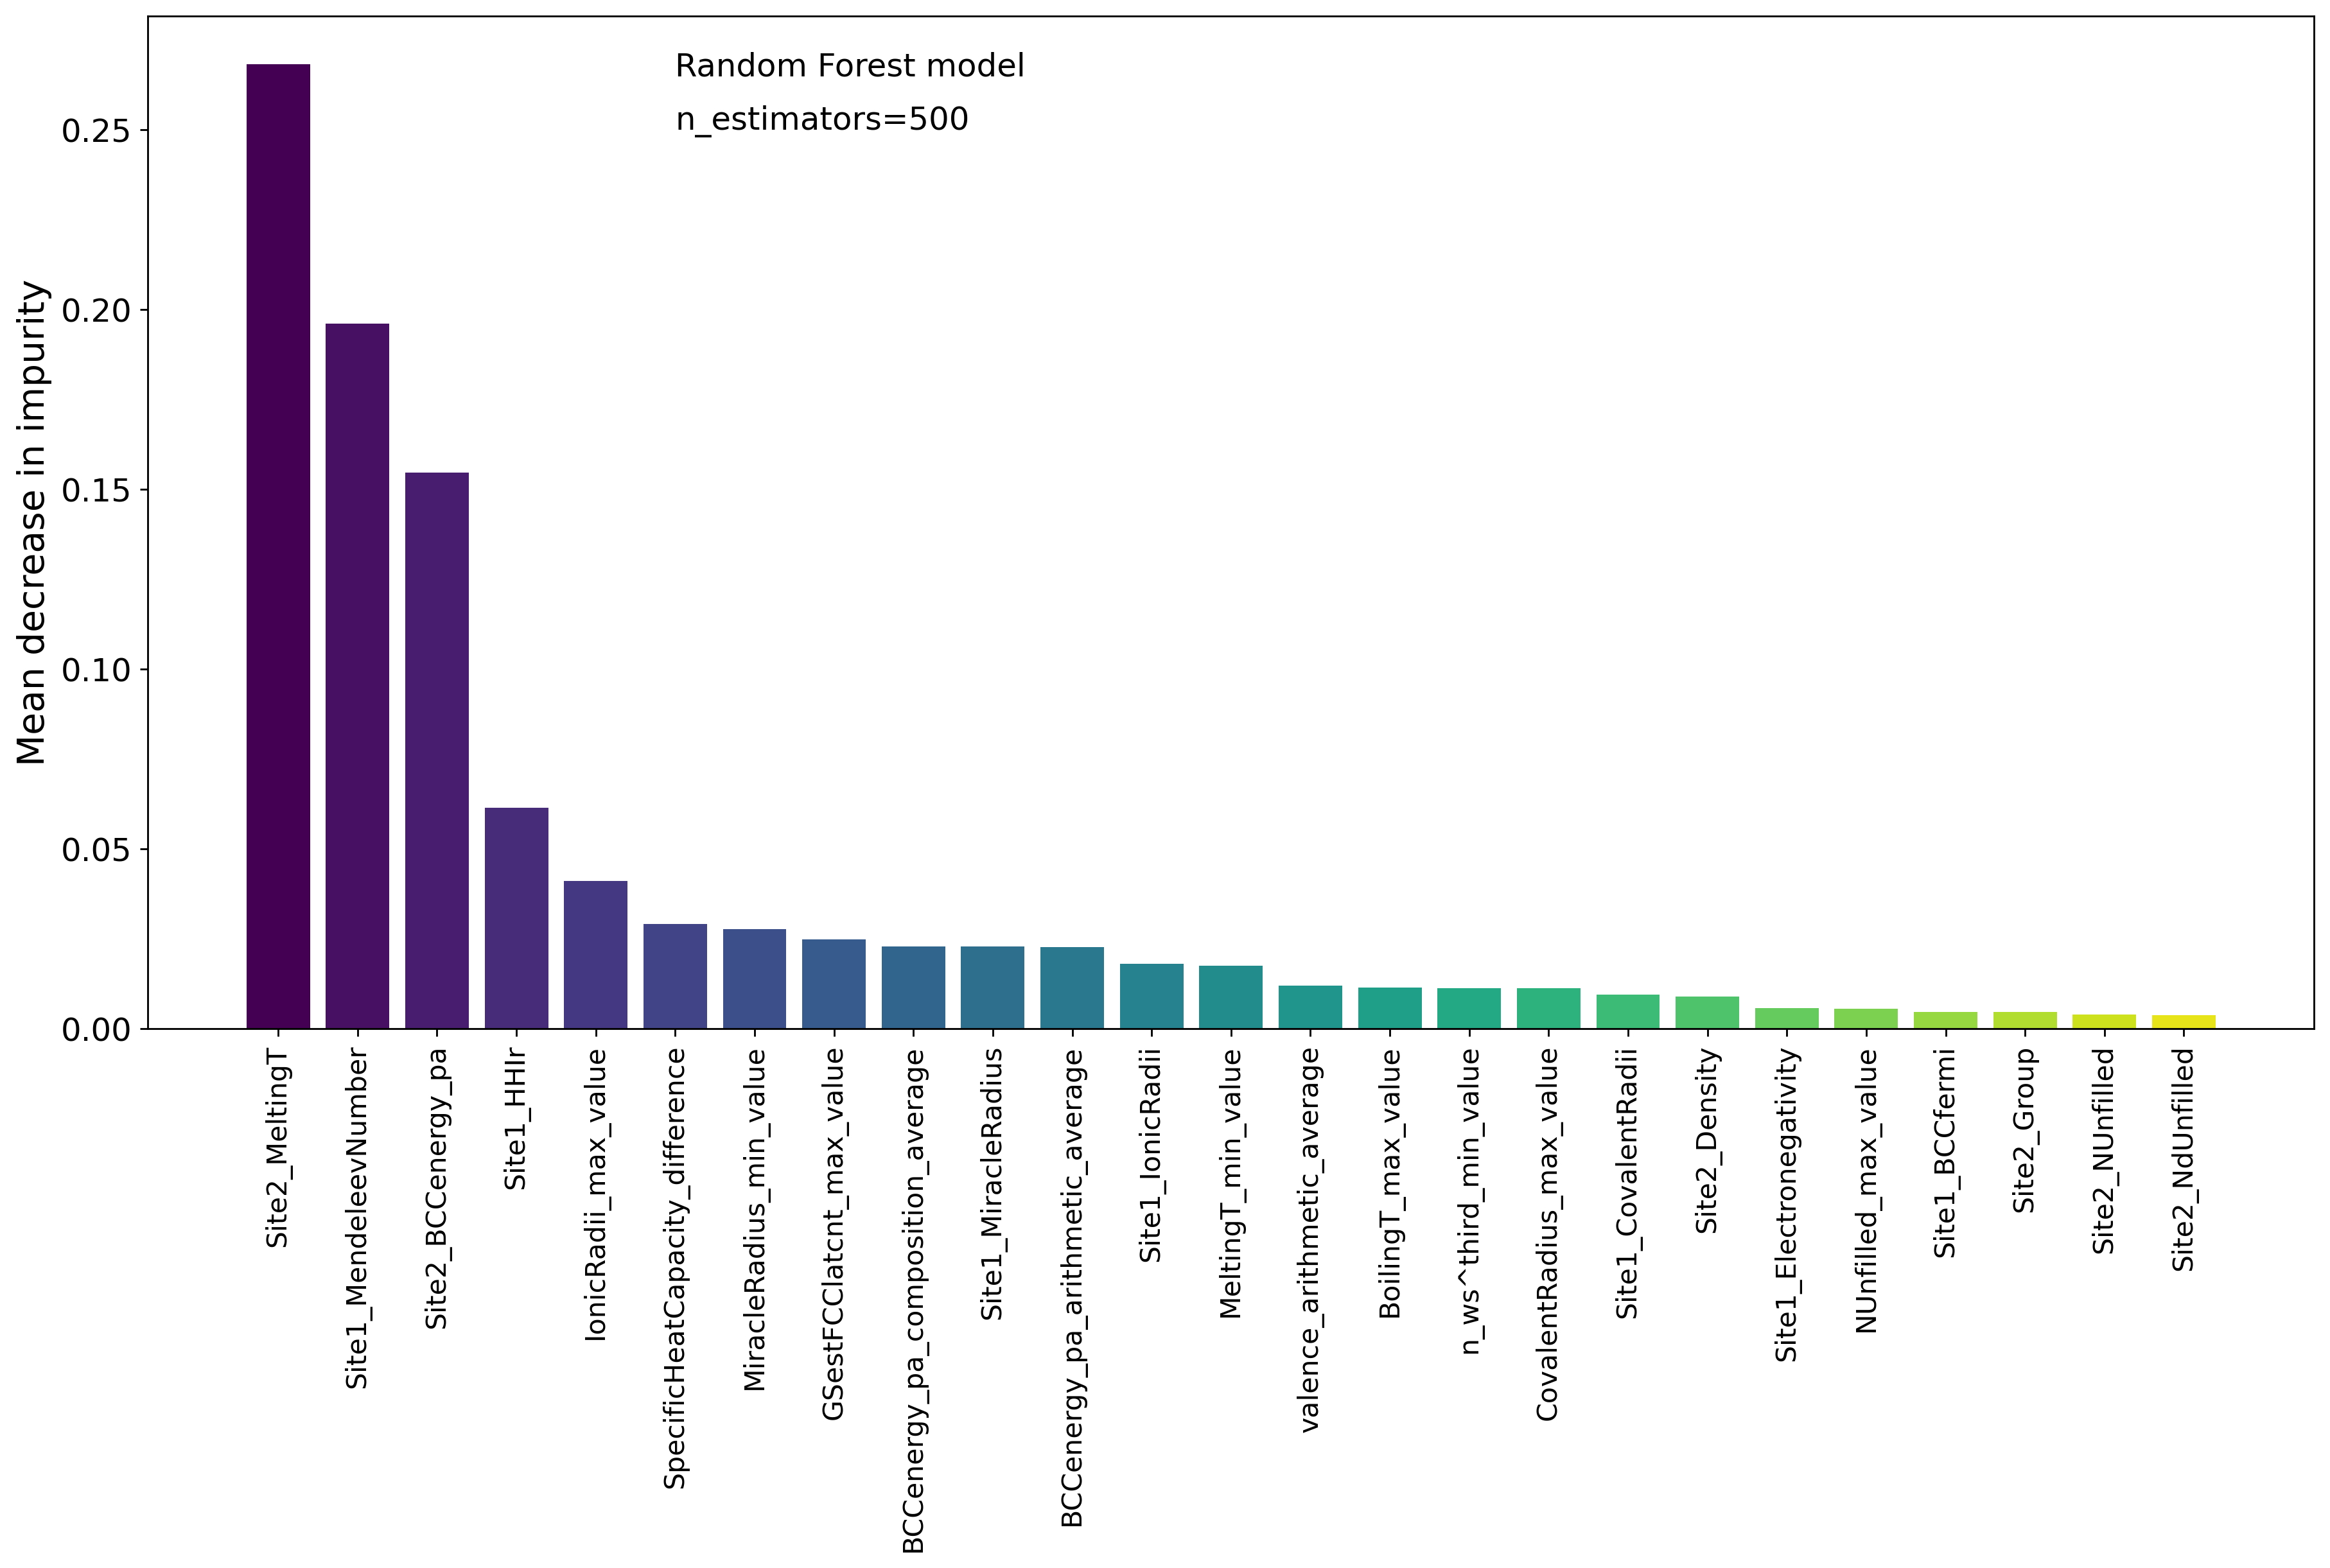

In [18]:
#################################### feature importance ####################################

from sklearn.ensemble import RandomForestRegressor
from matplotlib.cm import get_cmap
from sklearn.preprocessing import MinMaxScaler

mpl.rcParams.update({'font.size': 14})

def plot_cmap(labels, data, ax, chart_type='bar', cmap=None):
    
    # scale data for compatibility with cmap
    den = max(data) - min(data)
    
 #   scaled_data = [(datum-min(data))/den for datum in data]
    scaled_data = [(0.05 + i)/25 for i in range(25)]
    
    # get colors corresponding to data
    colors = []
    my_cmap = get_cmap(cmap)
    
    for decimal in scaled_data:
        colors.append(my_cmap(decimal))
    fig.patch.set_facecolor('white')

    try:
        getattr(ax, chart_type)(labels, data, color=colors)
    
    except:
        getattr(ax, chart_type)(data, labels=labels, colors=colors)
        
scaler = MinMaxScaler()
standardized_data = scaler.fit_transform(data_new)
data_std = pd.DataFrame(standardized_data, columns=data_new.columns)

x_train = data_std.drop(['Enorm (eV)'],axis=1)
x_names = x_train.columns.unique()
y_train = data_std['Enorm (eV)']

fig, ax_2 = plt.subplots(1,1,figsize=(17, 8), dpi = 256)

forest = RandomForestRegressor(n_estimators=500, random_state=1)

#################################### plot #################################### 

forest_ = forest.fit(x_train, y_train)
        
importances = forest_.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plot_cmap(range(x_train.shape[1]), importances[sorted_indices], ax_2, chart_type='bar', cmap='viridis')
            
ax_2.set_ylabel("Mean decrease in impurity", fontsize=16)
ax_2.set_xticks(range(x_train.shape[1]), x_names[sorted_indices], rotation = 90, fontsize=12)
plt.text(5, 0.25, 'n_estimators=500')
plt.text(5, 0.265, 'Random Forest model')

plt.savefig('feature selection.tif', bbox_inches = 'tight')
plt.show()

In [13]:
selected_features = x_names[sorted_indices][0:13]
selected_features

Index(['Site2_MeltingT', 'Site1_MendeleevNumber', 'Site2_BCCenergy_pa',
       'Site1_HHIr', 'IonicRadii_max_value', 'SpecificHeatCapacity_difference',
       'MiracleRadius_min_value', 'GSestFCClatcnt_max_value',
       'BCCenergy_pa_composition_average', 'Site1_MiracleRadius',
       'BCCenergy_pa_arithmetic_average', 'Site1_IonicRadii',
       'MeltingT_min_value'],
      dtype='object')

In [39]:
######### train model ################
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = data_new[selected_features.values].values
y = data_new['Enorm (eV)'].values

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.20,
                                                    random_state=13)

scaler = StandardScaler().fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

print(x_train_norm.shape)
print(y_train.shape)
print(x_test_norm.shape)
print(y_test.shape)

(326, 13)
(326,)
(82, 13)
(82,)


In [15]:
######### train linear model ################

from sklearn.linear_model import LinearRegression

linear_ = LinearRegression().fit(x_train_norm, y_train)

mse_linear_train = mse(y_train, linear_.predict(x_train_norm))
mse_linear_test = mse(y_test, linear_.predict(x_test_norm))


print('mse of linear model-train:', mse_linear_train)
print('mse of linear model-test:', mse_linear_test)

mse of linear model-train: 0.062455033215032395
mse of linear model-test: 0.06589121724696005


In [16]:
######### train decision tree model ################

from sklearn.tree import DecisionTreeRegressor

parameters ={
    'min_samples_split':[i for i in range(2,10)],
    'max_depth': [i for i in range(1,10)]
}

DT = DecisionTreeRegressor()

rnd_search_cv_2 = RandomizedSearchCV(estimator=DT,
                                     param_distributions=parameters,
                                     n_iter=2,
                                     cv=5,
                                     verbose=0,
                                     n_jobs=-1,
                                     random_state=13
                                    )

rnd_search_cv_2.fit(x_train_norm, y_train)
opt_params = rnd_search_cv_2.best_params_
print(opt_params)

DT_opt =  DecisionTreeRegressor(min_samples_split=opt_params['min_samples_split'], max_depth=opt_params['max_depth'])
DT_opt.fit(x_train_norm, y_train)

mse_DT_train = mse(y_train, DT_opt.predict(x_train_norm))
mse_DT_test = mse(y_test, DT_opt.predict(x_test_norm))

print('mse of DT model-train:', mse_DT_train)
print('mse of DT model-test:', mse_DT_test)

{'min_samples_split': 5, 'max_depth': 4}
mse of DT model-train: 0.039059786349408765
mse of DT model-test: 0.08756377495624254


In [44]:
######### train ANN model ################
#chose one single hindden layer, adam optimizer

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

parameters_3 = {
    'activation': ['relu', 'sigmoid', 'tanh', 'LeakyReLU'],
    'units':[i for i in range(6, len(selected_features)+1)],
    "lr":(0.1,0.03,0.01,0.003,0.001,0.0003,0.0001)
}


def new_func(activation, units, lr):
    model = Sequential()
    model.add(Input(shape=x_train_norm.shape[1]))
    model.add(Dense(units=units, kernel_initializer='normal', activation=activation))
    model.add(Dense(1, kernel_initializer='normal'))
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    
    return model

estimator = KerasRegressor(build_fn=new_func, batch_size=50)
                           
rnd_search_cv_3 = RandomizedSearchCV(estimator=estimator,
                                     param_distributions=parameters_3,
                                     n_iter=30,
                                     cv=5,
                                     verbose=0,
                                     n_jobs=-1,
                                     random_state=13)

rnd_search_cv_3.fit(x_train_norm, y_train, epochs=50)

opt_result = rnd_search_cv_3.best_params_
print(opt_result)

/tmp/ipykernel_724/1013454624.py:27: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=new_func, batch_size=50)
2023-11-18 07:17:42.128536: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-18 07:17:42.128843: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate comp

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
6/6 [==============================] - 1s 3ms/step - loss: 0.2240 - accuracy: 0.0231
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2179 - accuracy: 0.0231
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.0231
Epoch 4/50
6/6 [==============================] - 1s 3ms/step - loss: 0.1948 - accuracy: 0.0345
Epoch 5/50
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.0231
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1907 - accuracy: 0.0345
Epoch 3/50
6/6 [==============================] - 1s 4ms/step - loss: 0.2237 - accuracy: 0.0460
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.0231
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.1860 - accuracy: 0.0231
Epoch 3/50
Epoch 5/50
Epoch 8/50
1/6 [====>.........................] - ETA: 3s - loss: 0.3

Epoch 1/50
2/2 [==============================] - 0s 3ms/step - loss: 0.0838 - accuracy: 0.0000e+00
Epoch 1/50
Epoch 1/50


Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.0421
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.0421
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.0421
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2502 - accuracy: 0.0421
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.0421
Epoch 2/50
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.0421
Epoch 3/50
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.0421
Epoch 8/50
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.0421
Epoch 5/50
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.0231
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2146 - accuracy: 0.0

2/2 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.0308
Epoch 1/50
2/2 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.0462


Epoch 1/50
6/6 [==============================] - 1s 3ms/step - loss: 0.2211 - accuracy: 0.0460
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.0460
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.0460
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.0460
Epoch 5/50
6/6 [==============================] - 1s 3ms/step - loss: 0.2461 - accuracy: 0.0421
Epoch 2/50
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 0.1803 - accuracy: 0.0460
Epoch 3/50
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.0421
Epoch 8/50
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.0421
Epoch 9/50
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.0421
Epoch 10/50
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1446 - a

6/6 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.0383
Epoch 50/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.0909
Epoch 1/50


6/6 [==============================] - 1s 2ms/step - loss: 0.1991 - accuracy: 0.0345
Epoch 2/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1933 - accuracy: 0.0345
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.0345
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.0345
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.0345
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1674 - accuracy: 0.0345
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.0345
Epoch 8/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2181 - accuracy: 0.0460
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 0.1518 - accuracy: 0.0345
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.0460
Epoch 3/50
6/6 [==============================] - 0

6/6 [==============================] - 0s 8ms/step - loss: 0.1062 - accuracy: 0.0345
Epoch 15/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0999 - accuracy: 0.0345
Epoch 16/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.0460
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0937 - accuracy: 0.0345
Epoch 17/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1469 - accuracy: 0.0460
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0888 - accuracy: 0.0345
Epoch 18/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.0460
Epoch 11/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.0345
Epoch 19/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1301 - accuracy: 0.0460
Epoch 12/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0814 - accuracy: 0.0345
Epoch 20/50
6/6 [==========================

Epoch 19/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.0421
Epoch 40/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0907 - accuracy: 0.0231
Epoch 20/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.0421
Epoch 41/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0890 - accuracy: 0.0231
Epoch 21/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.0421
Epoch 42/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0874 - accuracy: 0.0231
Epoch 22/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.0421
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.0231
Epoch 23/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.0421
Epoch 44/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.0231
Epoch 24/50
6/6 [=============

6/6 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.0231
Epoch 45/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.0231
Epoch 46/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.0231
Epoch 47/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.0231
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.0231
Epoch 49/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0620 - accuracy: 0.0231
Epoch 50/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.0231
Epoch 1/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2097 - accuracy: 0.0383
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.0383
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 0.0383
Epoch 4/50
6/6 [=============================

6/6 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.0460
Epoch 16/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0840 - accuracy: 0.0345
Epoch 24/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0830 - accuracy: 0.0345
Epoch 25/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0904 - accuracy: 0.0460
Epoch 18/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0819 - accuracy: 0.0345
Epoch 26/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0881 - accuracy: 0.0460
Epoch 19/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.0345
Epoch 27/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0861 - accuracy: 0.0460
Epoch 20/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0801 - accuracy: 0.0345
Epoch 28/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.0460
Epoch 21/50
6/6 [=========================

6/6 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.0345
Epoch 35/50
Epoch 28/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.0345
Epoch 29/50
Epoch 36/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0732 - accuracy: 0.0345
Epoch 37/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0730 - accuracy: 0.0460
Epoch 30/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0726 - accuracy: 0.0345
Epoch 38/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.0460
Epoch 31/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.0345
Epoch 39/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.0345
Epoch 1/50
Epoch 40/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.0345
Epoch 41/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.0460
Epoch 3

6/6 [==============================] - 0s 6ms/step - loss: 0.1117 - accuracy: 0.0421
Epoch 15/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1071 - accuracy: 0.0421
Epoch 1/50
Epoch 16/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1034 - accuracy: 0.0421
Epoch 17/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0999 - accuracy: 0.0421
Epoch 18/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.0421
Epoch 19/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2210 - accuracy: 0.0231
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0951 - accuracy: 0.0421
Epoch 20/50
6/6 [==============================] - 0s 6ms/step - loss: 0.2110 - accuracy: 0.0231
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.0421
Epoch 21/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.0231
Epoch 4/50
6/6 [=================

6/6 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.0345
Epoch 36/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0708 - accuracy: 0.0345
Epoch 37/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0659 - accuracy: 0.0383
Epoch 38/50
Epoch 40/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0697 - accuracy: 0.0345
Epoch 39/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.0154
Epoch 41/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.0345
Epoch 40/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.0383
Epoch 42/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.0345
Epoch 41/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.0383
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.0345
Epoch 42/50
6/6 [=============

6/6 [==============================] - 0s 2ms/step - loss: 0.0622 - accuracy: 0.0383
Epoch 47/50
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0658 - accuracy: 0.0345
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.0345
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.0345
Epoch 50/50
2/2 [==============================] - 0s 3ms/step - loss: 0.0713 - accuracy: 0.0308


2/2 [==============================] - 0s 4ms/step - loss: 0.0637 - accuracy: 0.0462
Epoch 1/50
Epoch 1/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2224 - accuracy: 0.0460
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.0460
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.0460
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.0460
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.0460
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 0.1647 - accuracy: 0.0460
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1532 - accuracy: 0.0460
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1430 - accuracy: 0.0460
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1319 - accuracy: 0.0460
Epoch 10/50
6/6 [=======================

6/6 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.0383
Epoch 36/50
Epoch 35/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.0231
Epoch 37/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0655 - accuracy: 0.0383
Epoch 36/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0587 - accuracy: 0.0231
Epoch 38/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0639 - accuracy: 0.0383
Epoch 37/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0580 - accuracy: 0.0231
Epoch 39/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0620 - accuracy: 0.0383
Epoch 38/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.0231
Epoch 40/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0604 - accuracy: 0.0383
Epoch 39/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.0231
Epoch 41/50
6/6 [=============

6/6 [==============================] - 0s 15ms/step - loss: 0.0563 - accuracy: 0.0383
Epoch 42/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0542 - accuracy: 0.0231
Epoch 44/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.0383
Epoch 43/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.0231
Epoch 45/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.0383
Epoch 44/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.0231
Epoch 46/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.0383
Epoch 45/50
Epoch 1/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0526 - accuracy: 0.0231
Epoch 47/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.0383
Epoch 46/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.0231
Epoch 48/50
6/6 [=============

6/6 [==============================] - 1s 3ms/step - loss: 0.2052 - accuracy: 0.0345
Epoch 2/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1983 - accuracy: 0.0345
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1913 - accuracy: 0.0345
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 0.1854 - accuracy: 0.0345
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1793 - accuracy: 0.0345
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1742 - accuracy: 0.0345
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1680 - accuracy: 0.0345
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 0.1628 - accuracy: 0.0345
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1577 - accuracy: 0.0345
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1516 - accuracy: 0.0345
Epoch 11/50
6/6 [==============================] -

6/6 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.0421
Epoch 30/50
Epoch 33/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.0231
Epoch 31/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.0231
Epoch 32/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.0231
Epoch 33/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.0231
Epoch 34/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.0231
Epoch 35/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.0421
Epoch 38/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0539 - accuracy: 0.0421
Epoch 36/50
Epoch 39/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.0231
Epoch 40/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.0421
Epoch 41/50
6/6 [=

Epoch 42/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.0421
Epoch 46/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.0231
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.0421
Epoch 47/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.0231
Epoch 44/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.0421
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.0231
Epoch 45/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.0421
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.0421
Epoch 50/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.0231
Epoch 47/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.0231
Epoch 48/50
6/6 [=============

6/6 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.0383
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.0383
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1855 - accuracy: 0.0383
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1798 - accuracy: 0.0383
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.0383
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.0383
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.0383
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 0.0383
Epoch 11/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.0383
Epoch 12/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1356 - accuracy: 0.0383
Epoch 13/50
6/6 [==============================]

6/6 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.0460
Epoch 47/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.0460
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.0460
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.0421
Epoch 40/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.0460
Epoch 50/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.0421
Epoch 41/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.0421
Epoch 42/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0403 - accuracy: 0.0421
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.0421
Epoch 44/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.0421
Epoch 45/50
6/6 [=========================

6/6 [==============================] - 0s 2ms/step - loss: 0.1434 - accuracy: 0.0231
Epoch 13/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.0231
Epoch 14/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.0231
Epoch 15/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1229 - accuracy: 0.0231
Epoch 16/50
6/6 [==============================] - 1s 6ms/step - loss: 0.2189 - accuracy: 0.0383
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 0.1171 - accuracy: 0.0231
Epoch 1/50
Epoch 17/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 0.0383
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1132 - accuracy: 0.0231
Epoch 18/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1093 - accuracy: 0.0231
Epoch 4/50
Epoch 19/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.0231
Epoch 20/50
Epoch 5/50

6/6 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.0460
Epoch 46/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.0460
Epoch 47/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0662 - accuracy: 0.0460
Epoch 48/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.0460
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.0460
Epoch 50/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0731 - accuracy: 0.0462
Epoch 1/50


Epoch 1/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2597 - accuracy: 0.0421
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.0421
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2438 - accuracy: 0.0421
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.0421
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.0421
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.0421
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.0421
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.0421
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.0421
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1720 - accuracy: 0.0421
Epoch 11/50
6/6 [======================

6/6 [==============================] - 0s 2ms/step - loss: 0.1049 - accuracy: 0.0231
Epoch 21/50
Epoch 39/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.0383
Epoch 13/50
Epoch 40/50
Epoch 22/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0826 - accuracy: 0.0421
Epoch 23/50
Epoch 14/50
Epoch 41/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0817 - accuracy: 0.0421
Epoch 24/50
Epoch 15/50
Epoch 42/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0807 - accuracy: 0.0421
Epoch 25/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.0383
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0806 - accuracy: 0.0231
Epoch 44/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1231 - accuracy: 0.0383
Epoch 26/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.0421
Epoch 45/50
6/6 [==============================] - 0s 2

6/6 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.0383
Epoch 47/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.0383
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.0383
Epoch 49/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0545 - accuracy: 0.0383
Epoch 50/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.0383
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.0345
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1984 - accuracy: 0.0345
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.0345
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 0.1914 - accuracy: 0.0345
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.0345
Epoch 7/50
6/6 [==============================]

6/6 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.0345
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.0345
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1641 - accuracy: 0.0345
Epoch 11/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1571 - accuracy: 0.0345
Epoch 1/50
Epoch 12/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1508 - accuracy: 0.0345
Epoch 13/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.0345
Epoch 14/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1358 - accuracy: 0.0345
Epoch 15/50
6/6 [==============================] - 0s 5ms/step - loss: 0.1296 - accuracy: 0.0345
Epoch 16/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1224 - accuracy: 0.0345
Epoch 17/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1167 - accuracy: 0.0345
Epoch 18/50
6/6 [===============

6/6 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.0421
Epoch 41/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.0231
Epoch 32/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0713 - accuracy: 0.0231
Epoch 42/50
Epoch 33/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.0421
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.0421
Epoch 35/50
Epoch 44/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.0231
Epoch 36/50
Epoch 1/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.0231
Epoch 37/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.0421
Epoch 46/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0670 - accuracy: 0.0231
Epoch 38/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0540 - accuracy: 0.0421
Epoch 4

Epoch 1/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0735 - accuracy: 0.0909
Epoch 1/50
6/6 [==============================] - 1s 3ms/step - loss: 0.2087 - accuracy: 0.0383
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1986 - accuracy: 0.0383
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1892 - accuracy: 0.0383
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.0383
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.0383
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.0383
Epoch 7/50
6/6 [==============================] - 1s 2ms/step - loss: 0.1979 - accuracy: 0.0345
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 0.1501 - accuracy: 0.0383
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1906 - accuracy: 0.0345
Epoch 3/50
6/6 [========================

Epoch 42/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.0460
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.0421
Epoch 43/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.0460
Epoch 49/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.0460
Epoch 50/50
1/6 [====>.........................] - ETA: 0s - loss: 0.0486 - accuracy: 0.0400Epoch 45/50
Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.0421
Epoch 46/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.0421
Epoch 47/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0670 - accuracy: 0.0421
Epoch 48/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.0421
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.0421
Epoch 50/50
2/2 [=======

6/6 [==============================] - 1s 2ms/step - loss: 0.2213 - accuracy: 0.0231
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 0.2181 - accuracy: 0.0231
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.0231
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2127 - accuracy: 0.0231
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.0231
Epoch 6/50
6/6 [==============================] - 1s 3ms/step - loss: 0.2557 - accuracy: 0.0383
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.0231
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 0.2074 - accuracy: 0.0231
Epoch 3/50
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.0383
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.0383
Epoch 5/50
6/6 [========================

6/6 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.0231
Epoch 12/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.0383
Epoch 8/50
6/6 [==============================] - 0s 7ms/step - loss: 0.1994 - accuracy: 0.0231
Epoch 13/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.0231
Epoch 14/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1957 - accuracy: 0.0231
Epoch 15/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1938 - accuracy: 0.0231
Epoch 16/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.0383
Epoch 12/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1916 - accuracy: 0.0231
Epoch 17/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.0383
Epoch 13/50
6/6 [==============================] - 0s 7ms/step - loss: 0.1893 - accuracy: 0.0231
Epoch 18/50
6/6 [==========================

6/6 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.0345
Epoch 38/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1245 - accuracy: 0.0345
Epoch 39/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1225 - accuracy: 0.0345
Epoch 40/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1205 - accuracy: 0.0345
Epoch 41/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1885 - accuracy: 0.0308
Epoch 1/50
6/6 [==============================] - 0s 7ms/step - loss: 0.1187 - accuracy: 0.0345
Epoch 42/50
6/6 [==============================] - 0s 7ms/step - loss: 0.2015 - accuracy: 0.0460
Epoch 18/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.0460
Epoch 19/50
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1987 - accuracy: 0.0460
Epoch 20/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.0460
Epoch 21/50
6/6 [==============

6/6 [==============================] - 1s 2ms/step - loss: 0.2773 - accuracy: 0.0421
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.0421
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.0421
Epoch 5/50
6/6 [==============================] - 0s 5ms/step - loss: 0.2540 - accuracy: 0.0421
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.0421
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.0421
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.0421
Epoch 9/50
6/6 [==============================] - 1s 3ms/step - loss: 0.2265 - accuracy: 0.0231
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.0421
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.0231
Epoch 3/50
6/6 [==============================] - 

6/6 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.0231
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.0421
Epoch 14/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.0231
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.0421
Epoch 15/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.0231
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 0.0421
Epoch 16/50
6/6 [==============================] - 0s 7ms/step - loss: 0.1864 - accuracy: 0.0231
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 0.2332 - accuracy: 0.0421
Epoch 17/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.0231
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.0421
Epoch 18/50
6/6 [=============================

6/6 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.0383
Epoch 46/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.0345
Epoch 27/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.0383
Epoch 47/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.0345
Epoch 28/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.0383
Epoch 48/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0619 - accuracy: 0.0345
Epoch 29/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.0383
Epoch 49/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.0345
Epoch 30/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.0383
Epoch 50/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.0345
Epoch 31/50
6/6 [=========================

6/6 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.0345
Epoch 50/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.0345
Epoch 1/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2196 - accuracy: 0.0460
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.0460
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.0460
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.0460
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.0460
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 0.1890 - accuracy: 0.0460
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.0460
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.0460
Epoch 9/50
6/6 [==============================] - 

6/6 [==============================] - 0s 3ms/step - loss: 0.2018 - accuracy: 0.0421
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.0460
Epoch 17/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1924 - accuracy: 0.0421
Epoch 9/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0992 - accuracy: 0.0460
Epoch 18/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1829 - accuracy: 0.0421
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.0460
Epoch 19/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1720 - accuracy: 0.0421
Epoch 11/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.0460
Epoch 20/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0820 - accuracy: 0.0460
Epoch 21/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.0421
Epoch 13/50
6/6 [===========================

6/6 [==============================] - 0s 9ms/step - loss: 0.0536 - accuracy: 0.0231
Epoch 35/50
Epoch 18/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.0231
Epoch 19/50
Epoch 36/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.0231
Epoch 37/50
Epoch 20/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.0383
Epoch 38/50
Epoch 21/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.0383
Epoch 39/50
Epoch 22/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0733 - accuracy: 0.0383
Epoch 40/50
Epoch 23/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.0231
Epoch 41/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0707 - accuracy: 0.0383
Epoch 24/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.0231
Epoch 42/50
6/6 [==============================] - 0s 2ms/step - lo

6/6 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.0383
Epoch 1/50
6/6 [==============================] - 1s 3ms/step - loss: 0.2025 - accuracy: 0.0345
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.0345
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.0345
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1869 - accuracy: 0.0345
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.0345
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.0345
Epoch 7/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2210 - accuracy: 0.0460
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1630 - accuracy: 0.0345
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.0460
Epoch 3/50
6/6 [==============================] - 0

6/6 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.0460
Epoch 21/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.0460
Epoch 22/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0805 - accuracy: 0.0460
Epoch 23/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0780 - accuracy: 0.0460
Epoch 24/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0642 - accuracy: 0.0345
Epoch 30/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.0460
Epoch 31/50
Epoch 25/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.0345
Epoch 32/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.0460
Epoch 26/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.0345
Epoch 33/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.0460
Epoch 1/50
6/6 [==============

6/6 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.0421
Epoch 35/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.0421
Epoch 36/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.0421
Epoch 37/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2361 - accuracy: 0.0231
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.0421
Epoch 38/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.0231
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.0421
Epoch 39/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.0231
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.0421
Epoch 40/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.0231
Epoch 5/50
6/6 [=============================

6/6 [==============================] - 0s 5ms/step - loss: 0.1286 - accuracy: 0.0231
Epoch 34/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1256 - accuracy: 0.0231
Epoch 35/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1223 - accuracy: 0.0231
Epoch 36/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1197 - accuracy: 0.0231
Epoch 1/50
Epoch 37/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1172 - accuracy: 0.0231
Epoch 38/50
6/6 [==============================] - 1s 3ms/step - loss: 0.2146 - accuracy: 0.0383
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.0231
Epoch 39/50
6/6 [==============================] - 0s 6ms/step - loss: 0.2073 - accuracy: 0.0383
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1122 - accuracy: 0.0231
Epoch 40/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2035 - accuracy: 0.0383
Epoch 4/50
6/6 [=================

Epoch 37/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.0345
Epoch 29/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.0383
Epoch 38/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1238 - accuracy: 0.0345
Epoch 30/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.0383
Epoch 39/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1001 - accuracy: 0.0383
Epoch 40/50
6/6 [==============================] - 1s 3ms/step - loss: 0.2301 - accuracy: 0.0460
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1191 - accuracy: 0.0345
Epoch 32/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0987 - accuracy: 0.0383
Epoch 41/50
6/6 [==============================] - 0s 7ms/step - loss: 0.1168 - accuracy: 0.0345
Epoch 3/50
Epoch 33/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.0383
Epoch 42/50
6/6 [===

Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1341 - accuracy: 0.0460
Epoch 32/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1304 - accuracy: 0.0460
Epoch 33/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1266 - accuracy: 0.0460
Epoch 34/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1234 - accuracy: 0.0460
Epoch 35/50
6/6 [==============================] - 0s 5ms/step - loss: 0.1201 - accuracy: 0.0460
Epoch 36/50
6/6 [==============================] - 1s 2ms/step - loss: 0.3478 - accuracy: 0.0421
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.0421
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.0460
Epoch 38/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.0421
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1112 - accuracy: 0.0460
Epoch 39/50
6/6 [=================

6/6 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.0231
Epoch 22/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1197 - accuracy: 0.0383
Epoch 13/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.0231
Epoch 23/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1137 - accuracy: 0.0383
Epoch 14/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0951 - accuracy: 0.0231
Epoch 24/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1087 - accuracy: 0.0383
Epoch 15/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.0383
Epoch 25/50
Epoch 16/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.0383
Epoch 26/50
Epoch 17/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.0383
Epoch 27/50
Epoch 18/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.0231
Epoch 

6/6 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 0.0383
Epoch 35/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0784 - accuracy: 0.0383
Epoch 36/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.0231
Epoch 46/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0776 - accuracy: 0.0383
Epoch 37/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0768 - accuracy: 0.0383
Epoch 38/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0723 - accuracy: 0.0231
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.0231
Epoch 39/50
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.0383
Epoch 50/50
Epoch 40/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.0383
Epoch 41/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.0383
Epoch 42/50
6/6 [=

6/6 [==============================] - 1s 3ms/step - loss: 0.2012 - accuracy: 0.0345
Epoch 2/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1958 - accuracy: 0.0345
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1909 - accuracy: 0.0345
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1861 - accuracy: 0.0345
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1803 - accuracy: 0.0345
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1750 - accuracy: 0.0345
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.0345
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.0345
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1554 - accuracy: 0.0345
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.0345
Epoch 11/50
6/6 [==============================] -

6/6 [==============================] - 0s 3ms/step - loss: 0.1340 - accuracy: 0.0345
Epoch 13/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1281 - accuracy: 0.0345
Epoch 14/50
6/6 [==============================] - 1s 3ms/step - loss: 0.2201 - accuracy: 0.0460
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.0345
Epoch 15/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.0460
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1156 - accuracy: 0.0345
Epoch 16/50
6/6 [==============================] - 0s 7ms/step - loss: 0.1106 - accuracy: 0.0345
Epoch 17/50
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1056 - accuracy: 0.0345
Epoch 6/50
Epoch 18/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1020 - accuracy: 0.0345
Epoch 7/50
Epoch 19/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.0460
Epoch 8/50


6/6 [==============================] - 0s 2ms/step - loss: 0.0868 - accuracy: 0.0421
Epoch 33/50
6/6 [==============================] - 1s 3ms/step - loss: 0.2214 - accuracy: 0.0231
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.0421
Epoch 35/50
6/6 [==============================] - 0s 6ms/step - loss: 0.2157 - accuracy: 0.0231
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.0231
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0832 - accuracy: 0.0421
Epoch 37/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.0231
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.0231
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0814 - accuracy: 0.0421
Epoch 39/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1896 - accuracy: 0.0231
Epoch 7/50
6/6 [==============================]

6/6 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.0231
Epoch 44/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.0231
Epoch 45/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1854 - accuracy: 0.0383
Epoch 8/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0575 - accuracy: 0.0231
Epoch 46/50
6/6 [==============================] - 0s 7ms/step - loss: 0.1788 - accuracy: 0.0383
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.0231
Epoch 47/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1728 - accuracy: 0.0383
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.0231
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.0383
Epoch 11/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.0231
Epoch 49/50
6/6 [===========================

6/6 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.0345
Epoch 29/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.0383
Epoch 39/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0780 - accuracy: 0.0345
Epoch 30/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0584 - accuracy: 0.0383
Epoch 40/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0762 - accuracy: 0.0345
Epoch 31/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.0383
Epoch 41/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.0345
Epoch 32/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.0383
Epoch 42/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.0345
Epoch 33/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.0383
Epoch 43/50
6/6 [=========================

6/6 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.0460
Epoch 28/50
Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.0460
Epoch 29/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.0460
Epoch 30/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.0460
Epoch 31/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2647 - accuracy: 0.0421
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.0460
Epoch 32/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2608 - accuracy: 0.0421
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.0460
Epoch 33/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.0421
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.0460
Epoch 34/50
6/6 [=================

Epoch 1/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0559 - accuracy: 0.0460
Epoch 10/50
Epoch 40/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2205 - accuracy: 0.0421
Epoch 41/50
Epoch 11/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.0460
Epoch 42/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 0.0421
Epoch 12/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.0460
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.0421
Epoch 13/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.0460
Epoch 44/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.0421
Epoch 14/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.0460
Epoch 15/50
Epoch 45/50
6/6 [==============================] - 0s 6ms/step - loss: 0.1705 - accuracy: 0.

6/6 [==============================] - 0s 2ms/step - loss: 0.1776 - accuracy: 0.0231
Epoch 44/50
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.0421
Epoch 45/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.0231
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 0.0421
Epoch 46/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1460 - accuracy: 0.0231
Epoch 47/50
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0538 - accuracy: 0.0421
Epoch 48/50
6/6 [==============================] - 0s 7ms/step - loss: 0.1368 - accuracy: 0.0231
Epoch 11/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.0421
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.0231
Epoch 12/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.0421
Epoch 50/50
6/6 [===

6/6 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.0383
Epoch 47/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1201 - accuracy: 0.0345
Epoch 13/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.0383
Epoch 1/50
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.0345
Epoch 14/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0659 - accuracy: 0.0383
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.0345
Epoch 15/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.0383
Epoch 50/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.0345
Epoch 16/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.0345
Epoch 17/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.0345
Epoch 18/50
6/6 [==============

6/6 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.0460
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.0460
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.0460
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 0.1815 - accuracy: 0.0460
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.0460
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1614 - accuracy: 0.0460
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1504 - accuracy: 0.0460
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1411 - accuracy: 0.0460
Epoch 11/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 0.0460
Epoch 12/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1240 - accuracy: 0.0460
Epoch 13/50
6/6 [==============================]

Epoch 14/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1089 - accuracy: 0.0460
Epoch 15/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1042 - accuracy: 0.0460
Epoch 16/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1001 - accuracy: 0.0460
Epoch 17/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.0460
Epoch 18/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0946 - accuracy: 0.0460
Epoch 19/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.0460
Epoch 20/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0906 - accuracy: 0.0460
Epoch 21/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 0.0460
Epoch 22/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0881 - accuracy: 0.0460
Epoch 23/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.0460
Epoch 24/50
6/6 [=============

6/6 [==============================] - 0s 2ms/step - loss: 0.0944 - accuracy: 0.0421
Epoch 25/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0928 - accuracy: 0.0421
Epoch 26/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1826 - accuracy: 0.0383
Epoch 11/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0914 - accuracy: 0.0421
Epoch 27/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1852 - accuracy: 0.0231
Epoch 16/50
Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.0421
Epoch 12/50
Epoch 28/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1826 - accuracy: 0.0231
Epoch 17/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.0421
Epoch 29/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1764 - accuracy: 0.0383
Epoch 13/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1799 - accuracy: 0.0231
Epoch 18/50
6/6 [==

6/6 [==============================] - 1s 3ms/step - loss: 0.1989 - accuracy: 0.0345
Epoch 2/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.0345
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.0345
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.0345
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 0.0345
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.0345
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1856 - accuracy: 0.0345
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1833 - accuracy: 0.0345
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1808 - accuracy: 0.0345
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.0345
Epoch 11/50
6/6 [==============================] -

6/6 [==============================] - 0s 5ms/step - loss: 0.1313 - accuracy: 0.0345
Epoch 27/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.0345
Epoch 28/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.0345
Epoch 29/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1233 - accuracy: 0.0345
Epoch 30/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1208 - accuracy: 0.0345
Epoch 31/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.0345
Epoch 32/50
6/6 [==============================] - 0s 5ms/step - loss: 0.1161 - accuracy: 0.0345
Epoch 33/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.0345
Epoch 34/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.0345
Epoch 35/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.0345
Epoch 36/50
6/6 [=========================

1/6 [====>.........................] - ETA: 0s - loss: 0.1585 - accuracy: 0.0400Epoch 1/50
Epoch 16/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.0231
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.0421
Epoch 17/50
Epoch 31/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.0231
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1285 - accuracy: 0.0460
Epoch 32/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.0421
Epoch 18/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2173 - accuracy: 0.0231
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.0421
Epoch 19/50
Epoch 33/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.0231
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.0421
Epoch 20/50
6/6 

6/6 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.0231
Epoch 47/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2060 - accuracy: 0.0383
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.0231
Epoch 48/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.0383
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.0231
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.0383
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.0231
Epoch 50/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1993 - accuracy: 0.0383
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0969 - accuracy: 0.0231
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.0383
Epoch 7/50
6/6 [==============================]

6/6 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 0.0383
Epoch 25/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1366 - accuracy: 0.0383
Epoch 26/50
Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.0383
Epoch 27/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1300 - accuracy: 0.0383
Epoch 28/50
6/6 [==============================] - 0s 5ms/step - loss: 0.1270 - accuracy: 0.0383
Epoch 29/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.0383
Epoch 30/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1208 - accuracy: 0.0383
Epoch 31/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1178 - accuracy: 0.0383
Epoch 32/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1151 - accuracy: 0.0383
Epoch 33/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.0383
Epoch 34/50
6/6 [==============

Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.0460
Epoch 19/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1182 - accuracy: 0.0345
Epoch 33/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.0421
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.0460
Epoch 20/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1159 - accuracy: 0.0345
Epoch 34/50
6/6 [==============================] - 0s 7ms/step - loss: 0.2368 - accuracy: 0.0421
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.0460
Epoch 21/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1134 - accuracy: 0.0345
Epoch 35/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2347 - accuracy: 0.0421
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.0460
Epoch 22/50
6/6 [=================

6/6 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.0421
Epoch 35/50
6/6 [==============================] - 0s 6ms/step - loss: 0.1258 - accuracy: 0.0421
Epoch 36/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1230 - accuracy: 0.0421
Epoch 37/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1206 - accuracy: 0.0421
Epoch 38/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.0421
Epoch 39/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1158 - accuracy: 0.0421
Epoch 40/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.0421
Epoch 41/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.0421
Epoch 42/50
6/6 [==============================] - 0s 5ms/step - loss: 0.1093 - accuracy: 0.0421
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.0421
Epoch 45/50
6/6 [=========================

6/6 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.0421
Epoch 47/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.0231
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 0.1018 - accuracy: 0.0421
Epoch 48/50
6/6 [==============================] - 0s 6ms/step - loss: 0.2134 - accuracy: 0.0231
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.0231
Epoch 49/50
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0995 - accuracy: 0.0421
Epoch 7/50
Epoch 50/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.0421
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.0231
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 0.2018 - accuracy: 0.0231
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1991 - accuracy: 0.0231
Epoch 11/50
6/6 [=======

6/6 [==============================] - 0s 5ms/step - loss: 0.1424 - accuracy: 0.0231
Epoch 26/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.0231
Epoch 27/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.0231
Epoch 28/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1307 - accuracy: 0.0231
Epoch 29/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.0231
Epoch 30/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.0231
Epoch 31/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1203 - accuracy: 0.0231
Epoch 32/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1174 - accuracy: 0.0231
Epoch 33/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.0231
Epoch 34/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1117 - accuracy: 0.0231
Epoch 35/50
6/6 [=========================

6/6 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.0383
Epoch 6/50
Epoch 34/50
Epoch 25/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.0460
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.0383
Epoch 35/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.0460
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.0383
Epoch 36/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.0460
Epoch 9/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1989 - accuracy: 0.0460
Epoch 10/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1013 - accuracy: 0.0383
Epoch 38/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0996 - accuracy: 0.0383
Epoch 39/50
Epoch 11/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1938 - accuracy: 0.0460
Epoch 12/5

Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.0460
Epoch 49/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2585 - accuracy: 0.0421
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0909 - accuracy: 0.0460
Epoch 50/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.0421
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.0460
Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.0421
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.2381 - accuracy: 0.0421
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.0421
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2318 - accuracy: 0.0421
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.0421
Epoch 10/50
6/6 [=====================

6/6 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.0421
Epoch 25/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.0421
Epoch 26/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.0421
Epoch 27/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.0421
Epoch 28/50
6/6 [==============================] - 0s 5ms/step - loss: 0.1658 - accuracy: 0.0421
Epoch 29/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.0421
Epoch 30/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.0421
Epoch 31/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1533 - accuracy: 0.0421
Epoch 32/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.0421
Epoch 33/50
6/6 [==============================] - 1s 5ms/step - loss: 0.2358 - accuracy: 0.0231
Epoch 2/50
6/6 [==========================

Epoch 13/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.0383
Epoch 42/50
Epoch 37/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.0345
Epoch 14/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0424 - accuracy: 0.0383
Epoch 43/50
Epoch 38/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1141 - accuracy: 0.0345
Epoch 15/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.0231
Epoch 44/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1071 - accuracy: 0.0345
Epoch 16/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.0231
Epoch 45/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.0345
Epoch 17/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.0231
Epoch 46/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.0383
Epoch 

6/6 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.0345
Epoch 45/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.0345
Epoch 46/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0375 - accuracy: 0.0345
Epoch 47/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.0345
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.0345
Epoch 49/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.0345
Epoch 50/50
6/6 [==============================] - 1s 4ms/step - loss: 0.2180 - accuracy: 0.0460
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.0460
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.0460
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.0460
Epoch 5/50
6/6 [=============================

Epoch 19/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0839 - accuracy: 0.0460
Epoch 20/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0786 - accuracy: 0.0460
Epoch 21/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.0460
Epoch 22/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.0460
Epoch 23/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.0460
Epoch 24/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.0460
Epoch 25/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0576 - accuracy: 0.0460
Epoch 26/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.0460
Epoch 27/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.0460
Epoch 28/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.0460
Epoch 29/50
6/6 [=============

6/6 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.0383
Epoch 42/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.0383
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.0383
Epoch 44/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.0383
Epoch 45/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.0383
Epoch 46/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0494 - accuracy: 0.0383
Epoch 47/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.0383
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.0383
Epoch 49/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.0383
Epoch 50/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0489 - accuracy: 0.0308
Epoch 1/50
6/6 [==========================

Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.0345
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.0345
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1835 - accuracy: 0.0345
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1790 - accuracy: 0.0345
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1744 - accuracy: 0.0345
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1703 - accuracy: 0.0345
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1660 - accuracy: 0.0345
Epoch 11/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.0345
Epoch 12/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2185 - accuracy: 0.0460
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.0460
Epoch 3/50
6/6 [=====================

6/6 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.0231
Epoch 30/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.0231
Epoch 31/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.0231
Epoch 32/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.0231
Epoch 33/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0732 - accuracy: 0.0231
Epoch 34/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.0231
Epoch 35/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.0231
Epoch 36/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.0231
Epoch 37/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 0.0231
Epoch 38/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.0231
Epoch 39/50
6/6 [=========================

Epoch 42/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.0231
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0658 - accuracy: 0.0231
Epoch 44/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.0231
Epoch 45/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0643 - accuracy: 0.0231
Epoch 46/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.0231
Epoch 47/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.0231
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0630 - accuracy: 0.0231
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.0231
Epoch 50/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0742 - accuracy: 0.0909
Epoch 1/50
Epoch 1/50
Epoch 1/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2060 - accuracy: 0.0383
Epoch 2/5

6/6 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.0383
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1856 - accuracy: 0.0383
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.0383
Epoch 5/50
6/6 [==============================] - 0s 5ms/step - loss: 0.1661 - accuracy: 0.0383
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1565 - accuracy: 0.0383
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1468 - accuracy: 0.0383
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1377 - accuracy: 0.0383
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.0383
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 0.1214 - accuracy: 0.0383
Epoch 11/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1151 - accuracy: 0.0383
Epoch 12/50
6/6 [==============================] 

6/6 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.0345
Epoch 32/50
1/6 [====>.........................] - ETA: 0s - loss: 0.0477 - accuracy: 0.0400Epoch 29/50
Epoch 37/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.0460
Epoch 33/50
Epoch 38/50
Epoch 30/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0735 - accuracy: 0.0460
Epoch 34/50
Epoch 39/50
Epoch 31/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0751 - accuracy: 0.0345
Epoch 32/50
Epoch 40/50
Epoch 35/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.0345
Epoch 33/50
Epoch 36/50
Epoch 41/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0717 - accuracy: 0.0421
Epoch 37/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0712 - accuracy: 0.0460
Epoch 42/50
Epoch 34/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.0421
Epoch 43/50
6/6 [=======

2/2 [==============================] - 0s 4ms/step - loss: 0.0789 - accuracy: 0.0000e+00
Epoch 1/50
Epoch 1/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0567 - accuracy: 0.0154
Epoch 1/50


6/6 [==============================] - 1s 2ms/step - loss: 0.2313 - accuracy: 0.0231
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.0231
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2191 - accuracy: 0.0231
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.0231
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.0231
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.0231
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.0231
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.0231
Epoch 9/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2124 - accuracy: 0.0383
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 0.1677 - accuracy: 0.0231
Epoch 10/50
6/6 [==============================] - 

6/6 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.0460
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.0460
Epoch 44/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.0460
Epoch 45/50
Epoch 1/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.0460
Epoch 46/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.0460
Epoch 47/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.0460
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.0460
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.0460
Epoch 50/50
2/2 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.0000e+00
Epoch 1/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2633 - accuracy: 0.0421
Epoch 2/50
6/6 [============

6/6 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.0421
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.0421
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.0421
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.0421
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.0421
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.0421
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.0421
Epoch 10/50
6/6 [==============================] - 1s 3ms/step - loss: 0.2126 - accuracy: 0.0383
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.0383
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.0383
Epoch 4/50
6/6 [==============================] - 

6/6 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.0345
Epoch 41/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.0345
Epoch 42/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.0345
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.0345
Epoch 44/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.0345
Epoch 45/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0451 - accuracy: 0.0345
Epoch 46/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.0345
Epoch 47/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.0345
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.0345
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.0345
Epoch 50/50
2/2 [=========================

Epoch 1/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0396 - accuracy: 0.0462
Epoch 1/50
6/6 [==============================] - 1s 3ms/step - loss: 0.2231 - accuracy: 0.0460
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.0460
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.0460
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 0.2008 - accuracy: 0.0460
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.0460
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1838 - accuracy: 0.0460
Epoch 7/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2582 - accuracy: 0.0421
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1750 - accuracy: 0.0460
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.0421
Epoch 3/50
6/6 [========================

Epoch 36/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.0383
Epoch 37/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0552 - accuracy: 0.0383
Epoch 38/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.0383
Epoch 39/50
Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.0383
Epoch 40/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.0383
Epoch 41/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.0383
Epoch 42/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.0383
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.0383
Epoch 44/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.0383
Epoch 46/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.0383
Epoch 47/50
6/6 [==

Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.0383
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.0383
Epoch 50/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0466 - accuracy: 0.0383
Epoch 1/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0489 - accuracy: 0.0308
Epoch 1/50


6/6 [==============================] - 1s 2ms/step - loss: 0.2036 - accuracy: 0.0345
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.0345
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.0345
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1934 - accuracy: 0.0345
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.0345
Epoch 6/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2298 - accuracy: 0.0460
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1848 - accuracy: 0.0345
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.0460
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1789 - accuracy: 0.0345
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 0.2225 - accuracy: 0.0460
Epoch 4/50
6/6 [==============================] - 0

6/6 [==============================] - 0s 2ms/step - loss: 0.1322 - accuracy: 0.0231
Epoch 41/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1295 - accuracy: 0.0231
Epoch 42/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.0231
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1251 - accuracy: 0.0231
Epoch 44/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1230 - accuracy: 0.0231
Epoch 1/50
Epoch 45/50
6/6 [==============================] - 0s 6ms/step - loss: 0.1206 - accuracy: 0.0231
Epoch 46/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.0231
Epoch 47/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.0231
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.0231
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.0231
Epoch 50/50
2/2 [==============

6/6 [==============================] - 1s 3ms/step - loss: 0.2082 - accuracy: 0.0383
Epoch 2/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2069 - accuracy: 0.0383
Epoch 3/50
6/6 [==============================] - 1s 3ms/step - loss: 0.2024 - accuracy: 0.0345
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.0383
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1992 - accuracy: 0.0345
Epoch 5/50
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.0345
Epoch 6/50
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 0.2024 - accuracy: 0.0383
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1953 - accuracy: 0.0345
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2013 - accuracy: 0.0383
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 0.1935 - accuracy: 0.0345
Epoch 6/50
6/6 [=============

6/6 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.0421
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.0421
Epoch 44/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.0421
Epoch 45/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1319 - accuracy: 0.0421
Epoch 46/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1296 - accuracy: 0.0421
Epoch 47/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1274 - accuracy: 0.0421
Epoch 48/50
Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1251 - accuracy: 0.0421
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1231 - accuracy: 0.0421
Epoch 50/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0669 - accuracy: 0.0154
Epoch 1/50


6/6 [==============================] - 1s 3ms/step - loss: 0.2285 - accuracy: 0.0231
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.0231
Epoch 3/50
6/6 [==============================] - 1s 4ms/step - loss: 0.2114 - accuracy: 0.0383
Epoch 4/50
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.0383
Epoch 5/50
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.0383
Epoch 4/50
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.0383
Epoch 7/50
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.0383
Epoch 6/50
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.0383
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 0.1803 - accuracy: 0.0383
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.0

6/6 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.0460
Epoch 48/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0385 - accuracy: 0.0460
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.0460
Epoch 50/50
2/2 [==============================] - 0s 4ms/step - loss: 0.0559 - accuracy: 0.0000e+00
Epoch 1/50


6/6 [==============================] - 1s 3ms/step - loss: 0.2677 - accuracy: 0.0421
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2617 - accuracy: 0.0421
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.0421
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.0421
Epoch 5/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2894 - accuracy: 0.0231
Epoch 6/50
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2690 - accuracy: 0.0231
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 0.2426 - accuracy: 0.0421
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 0.2517 - accuracy: 0.0231
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.0421
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.0231
Epoch 5/50
6/6 [========================

6/6 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.0345
Epoch 42/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.0345
Epoch 43/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0977 - accuracy: 0.0345
Epoch 44/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.0345
Epoch 45/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.0345
Epoch 46/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0949 - accuracy: 0.0345
Epoch 47/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0941 - accuracy: 0.0345
Epoch 48/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.0345
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.0345
Epoch 50/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1096 - accuracy: 0.0462
Epoch 1/50
1/6 [====>.....................

6/6 [==============================] - 1s 2ms/step - loss: 0.2234 - accuracy: 0.0460
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.0460
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.0460
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.0460
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.0460
Epoch 6/50
6/6 [==============================] - 1s 2ms/step - loss: 0.2525 - accuracy: 0.0421
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.0460
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 0.2469 - accuracy: 0.0421
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 0.2036 - accuracy: 0.0460
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2431 - accuracy: 0.0421
Epoch 4/50
6/6 [==============================] - 0

6/6 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.0383
Epoch 44/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.0383
Epoch 45/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.0383
Epoch 46/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.0383
Epoch 47/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.0383
Epoch 48/50
2/2 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.0154
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.0383
Epoch 50/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.0383
Epoch 1/50


6/6 [==============================] - 1s 2ms/step - loss: 0.2048 - accuracy: 0.0345
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1992 - accuracy: 0.0345
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.0345
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.0345
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.0345
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1769 - accuracy: 0.0345
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.0345
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1640 - accuracy: 0.0345
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.0345
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.0345
Epoch 11/50
6/6 [==============================] -

2023-11-18 07:19:02.363982: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 4ms/step - loss: 0.0391 - accuracy: 0.0154
Epoch 1/50
7/7 [==============================] - 1s 3ms/step - loss: 0.2208 - accuracy: 0.0368
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.0368
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.2072 - accuracy: 0.0368
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.1987 - accuracy: 0.0368
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.0368
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.0368
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.0368
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 0.1543 - accuracy: 0.0368
Epoch 9/50
7/7 [==============================] - 0s 2ms/step - loss: 0.1405 - accuracy: 0.0368
Epoch 10/50
7/7 [==============================] - 

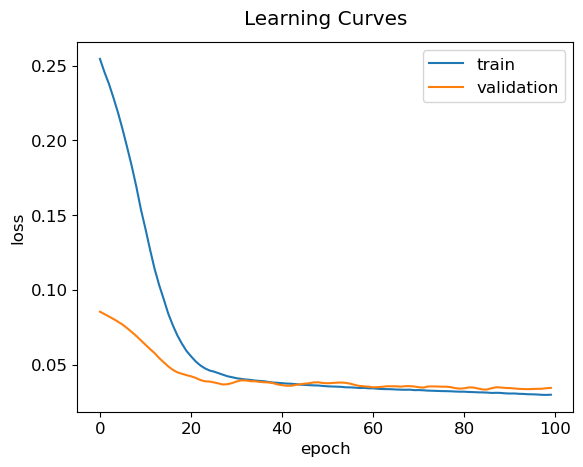

3/3 [==============================] - 0s 3ms/step
mse of ann model-train: 0.030705409814632954
mse of ann model-test: 0.03649951573552162


In [95]:
opt_ann = new_func(units=opt_result['units'], lr=opt_result['lr'], activation=opt_result['activation'])

history = opt_ann.fit(x_train_norm, y_train, validation_split=0.2, epochs=100, batch_size=50, verbose=0)

plt.plot(range(100),history.history['loss'])
plt.plot(range(100),history.history['val_loss'])
plt.title('Learning Curves')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.savefig('model analysis.tif', bbox_inches = 'tight')
plt.show()

mse_ann_train = mse(y_train, opt_ann.predict(x_train_norm))
mse_ann_test = mse(y_test, opt_ann.predict(x_test_norm))

print('mse of ann model-train:', mse_ann_train)
print('mse of ann model-test:', mse_ann_test)

3/3 [==============================] - 0s 2ms/step


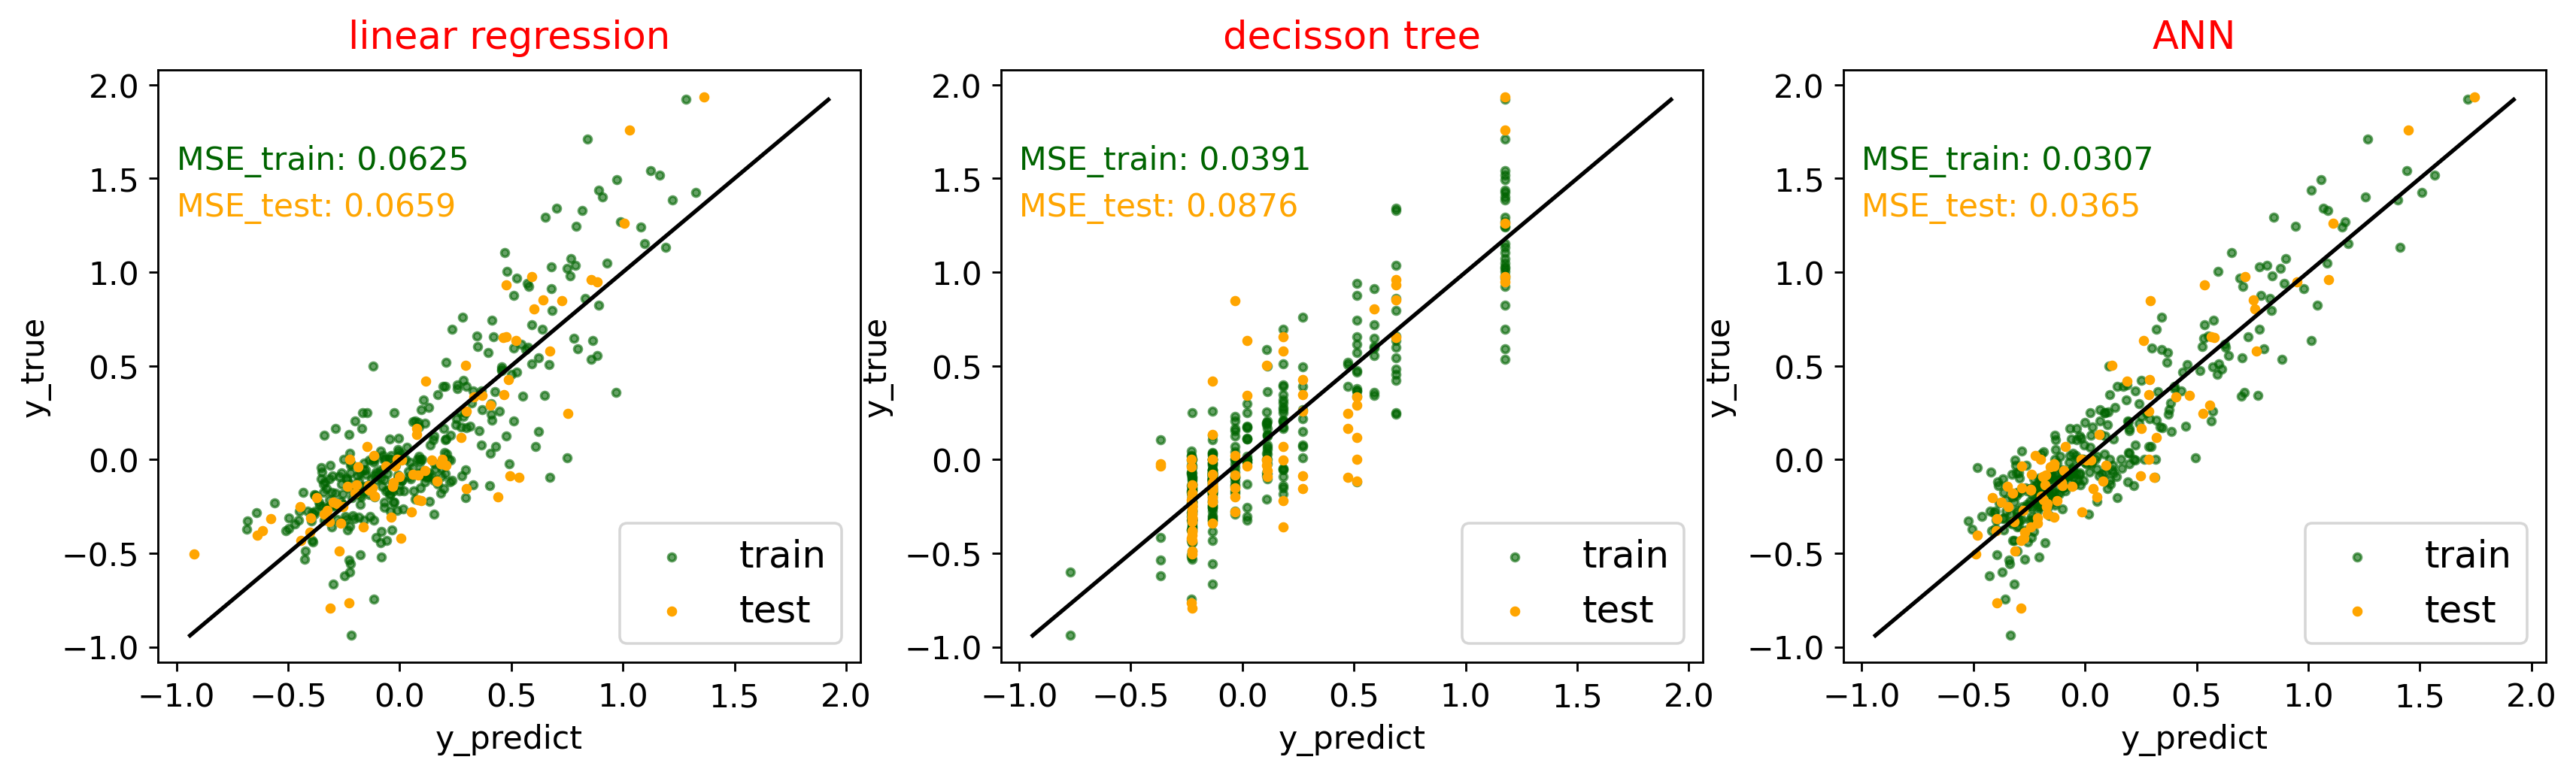

In [98]:
# compare three models deployed: linear regression, decisson tree, ANN
fig, ax = plt.subplots(1, 3, figsize=(16, 4), dpi = 256)
mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.titley'] = 1.1

y_predict_train_lr = linear_.predict(x_train_norm)
y_predict_test_lr = linear_.predict(x_test_norm)

y_predict_train_DT = DT_opt.predict(x_train_norm)
y_predict_test_DT = DT_opt.predict(x_test_norm)

y_predict_train_ann = opt_ann.predict(x_train_norm)
y_predict_test_ann = opt_ann.predict(x_test_norm)

model_names = ['linear regression', 'decisson tree', 'ANN']

mse_train = [y_predict_train_lr, y_predict_train_DT, y_predict_train_ann]
mse_test = [y_predict_test_lr, y_predict_test_DT, y_predict_test_ann]

mse_train_values = [mse_linear_train, mse_DT_train, mse_ann_train]
mse_test_values = [mse_linear_test, mse_DT_test, mse_ann_test]

for i in range(3):
    ax[i].scatter(mse_train[i], y_train, label='train', c='darkgreen', alpha=0.6, s=8)
    ax[i].scatter(mse_test[i], y_test, label='test', c='orange', alpha=1, s=8)
    ax[i].plot(np.arange(min(y_train),max(y_train),0.01), np.arange(min(y_train),max(y_train),0.01), c='black')
    ax[i].set_xlabel('y_predict')
    ax[i].set_ylabel('y_true')
    ax[i].set_title(model_names[i], c='red')
    ax[i].legend(fontsize=14, loc='lower right')
    ax[i].annotate('MSE_train: %.4f'%mse_train_values[i], (-1,1.55), fontsize=12, c='darkgreen')
    ax[i].annotate('MSE_test: %.4f'%mse_test_values[i], (-1,1.3), fontsize=12, c='orange')
    
plt.savefig('models comparison.tif', bbox_inches = 'tight')
plt.show()